In [1]:
# !pip install tensorflow

In [2]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is DC85-82A4

 Directory of d:\Github\DanhgiaDuAnVaNghenghiepTuongLai\code_ai\TestCode_ver1

06/13/2024  10:31 AM    <DIR>          .
06/13/2024  09:37 AM    <DIR>          ..
06/13/2024  10:30 AM        17,579,007 best_model.keras
06/13/2024  10:31 AM               772 categories.joblib
06/13/2024  10:30 AM                30 config.txt
06/13/2024  10:16 AM            14,503 predict.ipynb
06/13/2024  10:30 AM           164,450 TestCode6.ipynb
06/13/2024  10:31 AM            37,523 tokenizer.joblib
               6 File(s)     17,796,285 bytes
               2 Dir(s)  29,375,234,048 bytes free


In [3]:
!del /s /q categories.joblib
!del /s /q tokenizer.joblib

Deleted file - d:\Github\DanhgiaDuAnVaNghenghiepTuongLai\code_ai\TestCode_ver1\categories.joblib
Deleted file - d:\Github\DanhgiaDuAnVaNghenghiepTuongLai\code_ai\TestCode_ver1\tokenizer.joblib


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Hàm xây dựng mô hình tối ưu
def build_model(vocab_size, num_classes, input_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(num_classes, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
# Hàm vẽ biểu đồ
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Biểu đồ Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Biểu đồ Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [7]:
# Tạo từ điển ánh xạ với nhóm từ khóa cho mỗi chủ đề
technically = {
    'website': ['website', 'web'],
    'mobile-app': ['mobile app', 'app di động', 'Xây dựng ứng dụng', 'Xây dựng Ứng dụng', 'Ứng dụng di động', 'Phát triển ứng dụng', 'Xây dựng ứng dụng'],
    'game': ['game'],
    'chatbot': ['chatbot', 'chat bot'],
    'artificial-intelligence': ['trí tuệ nhân tạo'],
    'machine-learning': ['machine learning', 'máy học'],
    'deep-learning': ['deep learning', 'học sâu'],
    'computer-vision': ['computer vision', 'thị giác máy tính'],
    'big-data': ['big data', 'dữ liệu lớn', 'bigdata'],
    'data-analysis': ['data analysis', 'phân tích dữ liệu'],
    'cloud-computing': ['cloud computing', 'điện toán đám mây', 'K8s', 'kubernetes'],
    'blockchain': ['blockchain', 'chuỗi khối', 'NFT'],
    'robot': ['robot', 'robotics', 'robotic'],
    'drone': ['drone', 'flycam'],
    'vr': ['vr', 'thực tế ảo', 'virtual reality'],
    'iot': ['nhà thông minh', 'thiết bị thông minh'],
}

In [8]:
# Hàm phân loại chủ đề
def categorize_project(project_name):
    matched_themes = []
    for theme, keywords in technically.items():
        if any(keyword.lower() in project_name.lower() for keyword in keywords):
            matched_themes.append(theme)
    return ', '.join(matched_themes) if matched_themes else 'other'

In [9]:
# Tải dữ liệu
pd_data = pd.read_csv('D:/Github/DanhgiaDuAnVaNghenghiepTuongLai/dataset/dataset_train_ver1.csv')

df = pd_data[['nameProject_VNI']].copy()

# Đếm số lần xuất hiện của mỗi tên dự án
project_counts = df['nameProject_VNI'].value_counts()
# Hiển thị các tên dự án có số lần xuất hiện nhiều hơn 1
duplicate_projects = project_counts[project_counts > 1]
# print(duplicate_projects)

# Lọc và hiển thị các bản ghi có tên dự án trùng lặp
duplicates = df[df['nameProject_VNI'].isin(duplicate_projects.index)]
# print(duplicates)

# Loại bỏ các trùng lặp, chỉ giữ lại bản ghi đầu tiên
df = df.drop_duplicates(subset=['nameProject_VNI'], keep='first')

# Loại bỏ các trùng lặp, chỉ giữ lại bản ghi cuối cùng
# df_deduplicated = df.drop_duplicates(subset=['nameProject_VNI'], keep='last')

# Chọn `keep='first'` để giữ lại bản ghi đầu tiên của mỗi tên dự án trùng lặp và loại bỏ phần còn lại; hoặc chọn `keep='last'` để làm ngược lại.

In [10]:
# Đếm số lần xuất hiện của mỗi tên dự án
project_counts = df['nameProject_VNI'].value_counts()
# Hiển thị các tên dự án có số lần xuất hiện nhiều hơn 1
duplicate_projects = project_counts[project_counts > 1]
print(duplicate_projects)

Series([], Name: count, dtype: int64)


In [11]:
df['category'] = df['nameProject_VNI'].apply(categorize_project)
# pd_data
# print(df)

<Axes: xlabel='count', ylabel='note'>

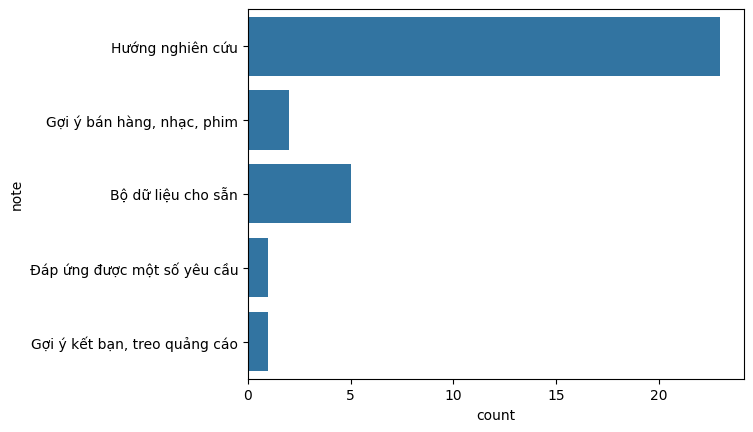

In [12]:
# UIT: Đại học Công nghệ thông tin HCM
# DUT: Đại học Đại học Bách Khoa - Đại học Đà Nẵng
# HCMUS: Đại học Khoa học Tự nhiên - Đại học Quốc gia TP.HCM
import seaborn as sns
sns.countplot(pd_data['note'])

In [13]:
# Số lượng đồ án của từng trường ĐH
pd_data['note'].value_counts()

note
Hướng nghiên cứu                 23
Bộ dữ liệu cho sẵn                5
Gợi ý bán hàng, nhạc, phim        2
Đáp ứng được một số yêu cầu       1
Gợi ý kết bạn, treo quảng cáo     1
Name: count, dtype: int64

In [14]:
# Tạo các cột chỉ báo cho mỗi chủ đề
category_dummies = pd.get_dummies(df['category'].apply(lambda x: x.split(', ')).explode()).groupby(level=0).sum()
df = pd.concat([df, category_dummies], axis=1)

In [15]:
df

,nameProject_VNI,category,artificial-intelligence,big-data,blockchain,chatbot,cloud-computing,computer-vision,data-analysis,deep-learning,drone,game,iot,machine-learning,mobile-app,other,robot,website
0,Xây dựng hệ thống quản lý sân cầu lông,other,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Tìm hiểu công nghệ Web 3.0 và ứng dụng web 3.0...,website,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Xây dựng hệ thống trợ giúp tư vấn hướng nghiệp...,other,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Xây dựng mạng xã hội kết hợp chatbot cho người...,chatbot,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Tìm hiểu Chatbot và xây dựng ứng dụng hỗ trợ t...,"mobile-app, chatbot",0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Tìm hiểu về Data Warehouse,other,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
611,Tìm hiểu phương pháp phân tích tương tác sản p...,other,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
612,Tìm hiểu một số phương pháp phân tích dữ liệu ...,"machine-learning, data-analysis",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
613,Tìm hiểu về phân tích dữ liệu trong kinh doanh,data-analysis,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [16]:
# Lấy văn bản dự án và các nhãn
texts = df['nameProject_VNI'].values
categories = df.columns.difference(['nameProject_VNI', 'category'])
labels = df[categories].values

In [17]:
# Chuẩn bị tokenizer và padding
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts)
# Chuyển đổi văn bản thành chuỗi số
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_length)

# Lưu các thông tin vào file txt
with open('config.txt', 'w') as file:
    file.write(f'MaxLength:{max_length}\n')
    file.write(f'NumWords:{num_words}\n')

In [18]:
# Chia dữ liệu thành huấn luyện và thử nghiệm
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [19]:
# Khởi tạo mô hình
model = build_model(10000, len(categories), max_length)

c:\Users\huuth\miniconda3\envs\dacs\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
# Early stopping và checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [21]:
!del /s /q best_model.keras
history = []
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

Deleted file - d:\Github\DanhgiaDuAnVaNghenghiepTuongLai\code_ai\TestCode_ver1\best_model.keras
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.1210 - loss: 0.5871 - val_accuracy: 0.4123 - val_loss: 0.2786
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3638 - loss: 0.2526 - val_accuracy: 0.4123 - val_loss: 0.1990
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3515 - loss: 0.1973 - val_accuracy: 0.4123 - val_loss: 0.1834
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3842 - loss: 0.1870 - val_accuracy: 0.4123 - val_loss: 0.1770
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4076 - loss: 0.1742 - val_accuracy: 0.4123 - val_loss: 0.1748
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3306 - loss: 0.1834 - val_accuracy: 0.4123 - val_loss: 0.1745
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3425 - loss: 0.1801 - val_accuracy: 0.4123 - val_loss: 0.1730
Epoch 8/

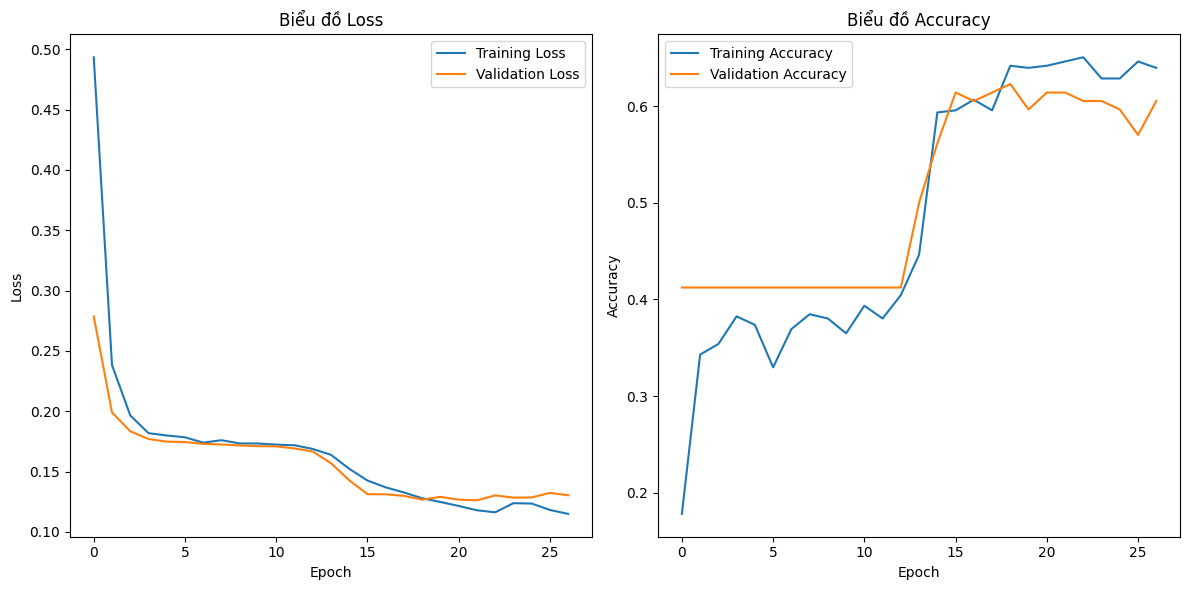

In [22]:
# Vẽ biểu đồ loss và accuracy
plot_history(history)

In [23]:
# Lưu tokenizer
import joblib

joblib.dump(categories, 'categories.joblib')
joblib.dump(tokenizer, 'tokenizer.joblib')

['tokenizer.joblib']

In [24]:
def predict_project_category(project_name):
    # Xử lý đầu vào để phù hợp với định dạng đã huấn luyện
    sequence = tokenizer.texts_to_sequences([project_name])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    
    # Dự đoán sử dụng mô hình đã huấn luyện
    prediction = model.predict(padded_sequence)
    predicted_categories = (prediction > 0.5).astype(int)
    
    # Ánh xạ dự đoán thành nhãn chủ đề
    predicted_labels = []
    for idx, category in enumerate(categories):
        if predicted_categories[0][idx] == 1:
            predicted_labels.append(category)

    return ', '.join(predicted_labels) if predicted_labels else 'Không xác định'

In [1]:
# Sử dụng hàm dự đoán
# project_name = "Dùng website để quản trị nhà máy điện"
project_name = "Xây dựng ứng dụng để quản lý thiết bị thông minh"
predicted_category = predict_project_category(project_name)
print(f"Đề tài '{project_name}' thuộc các chủ đề: {predicted_category}")

NameError: name 'predict_project_category' is not defined